In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('american.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={42: 'Output'})
df


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0,0.445830,0.622822,0.682357,0.665633,0.477212,0.371652,0.703395,0.483639,0.362394,...,0.324934,0.378909,0.294693,0.318382,0.372416,0.446065,0.394427,0.391802,0.418857,A
1,1,0.437077,0.609870,0.671381,0.653311,0.479296,0.373708,0.693127,0.484617,0.363065,...,0.314419,0.370842,0.291520,0.314124,0.371716,0.438732,0.390801,0.386985,0.413600,A
2,2,0.429815,0.598745,0.656085,0.640008,0.468939,0.371304,0.678013,0.470804,0.356360,...,0.305508,0.362922,0.287794,0.308684,0.359927,0.431710,0.384770,0.381839,0.405087,A
3,3,0.421285,0.588016,0.647482,0.637398,0.466717,0.371557,0.671898,0.469256,0.359433,...,0.295498,0.353767,0.281786,0.307080,0.348681,0.422009,0.376144,0.376243,0.397066,A
4,4,0.415245,0.582388,0.637336,0.627460,0.459035,0.368626,0.659945,0.458363,0.353874,...,0.290479,0.343555,0.271159,0.295592,0.340048,0.406985,0.360129,0.359839,0.383746,A
5,5,0.409842,0.569503,0.625413,0.622052,0.458072,0.370483,0.651394,0.460261,0.360251,...,0.270137,0.333517,0.255920,0.277227,0.317554,0.393995,0.344183,0.341244,0.358051,A
6,6,0.393910,0.548872,0.615799,0.616617,0.461157,0.369633,0.638178,0.460195,0.358412,...,0.269111,0.339896,0.266520,0.292258,0.329387,0.402879,0.356187,0.355782,0.369899,A
7,7,0.408940,0.567438,0.633859,0.612678,0.449773,0.359408,0.639625,0.451828,0.348951,...,0.289488,0.357070,0.259127,0.294348,0.336518,0.410494,0.353385,0.358262,0.381697,A
8,8,0.403390,0.559578,0.619751,0.605792,0.444887,0.353267,0.636363,0.450410,0.345668,...,0.279184,0.346054,0.259259,0.286353,0.329556,0.402523,0.351331,0.351142,0.373193,A
9,9,0.397440,0.556972,0.615802,0.606658,0.443453,0.359975,0.635344,0.445951,0.349852,...,0.271858,0.334351,0.259363,0.285525,0.320561,0.393867,0.348816,0.349454,0.369252,A


In [3]:
print("Uncleaned dataset shape =", df.shape)


Uncleaned dataset shape = (4453, 38)


In [4]:
all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))


Number of null values = 1


In [5]:
df.drop(all_null_values.index, inplace=True)


In [6]:
df


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
1,1,0.437077,0.609870,0.671381,0.653311,0.479296,0.373708,0.693127,0.484617,0.363065,...,0.314419,0.370842,0.291520,0.314124,0.371716,0.438732,0.390801,0.386985,0.413600,A
2,2,0.429815,0.598745,0.656085,0.640008,0.468939,0.371304,0.678013,0.470804,0.356360,...,0.305508,0.362922,0.287794,0.308684,0.359927,0.431710,0.384770,0.381839,0.405087,A
3,3,0.421285,0.588016,0.647482,0.637398,0.466717,0.371557,0.671898,0.469256,0.359433,...,0.295498,0.353767,0.281786,0.307080,0.348681,0.422009,0.376144,0.376243,0.397066,A
4,4,0.415245,0.582388,0.637336,0.627460,0.459035,0.368626,0.659945,0.458363,0.353874,...,0.290479,0.343555,0.271159,0.295592,0.340048,0.406985,0.360129,0.359839,0.383746,A
5,5,0.409842,0.569503,0.625413,0.622052,0.458072,0.370483,0.651394,0.460261,0.360251,...,0.270137,0.333517,0.255920,0.277227,0.317554,0.393995,0.344183,0.341244,0.358051,A
6,6,0.393910,0.548872,0.615799,0.616617,0.461157,0.369633,0.638178,0.460195,0.358412,...,0.269111,0.339896,0.266520,0.292258,0.329387,0.402879,0.356187,0.355782,0.369899,A
7,7,0.408940,0.567438,0.633859,0.612678,0.449773,0.359408,0.639625,0.451828,0.348951,...,0.289488,0.357070,0.259127,0.294348,0.336518,0.410494,0.353385,0.358262,0.381697,A
8,8,0.403390,0.559578,0.619751,0.605792,0.444887,0.353267,0.636363,0.450410,0.345668,...,0.279184,0.346054,0.259259,0.286353,0.329556,0.402523,0.351331,0.351142,0.373193,A
9,9,0.397440,0.556972,0.615802,0.606658,0.443453,0.359975,0.635344,0.445951,0.349852,...,0.271858,0.334351,0.259363,0.285525,0.320561,0.393867,0.348816,0.349454,0.369252,A
10,10,0.398181,0.549140,0.603785,0.600166,0.447325,0.360775,0.628418,0.455308,0.359831,...,0.253613,0.328714,0.259794,0.277032,0.308001,0.388566,0.347386,0.343108,0.359619,A


In [7]:
print("Cleaned dataset shape =", df.shape)


Cleaned dataset shape = (4452, 38)


In [8]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)


Features shape = (4452, 37)
Labels shape = (4452,)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')

In [11]:
svm.fit(x_train, y_train)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
print("Training score =", svm.score(x_train, y_train))


Training score = 1.0


In [13]:
y_pred = svm.predict(x_test)

In [14]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 0.9977553310886644


In [15]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')


In [16]:
f1, recall, precision

(0.9977553310886644, 0.9977553310886644, 0.9977553310886644)

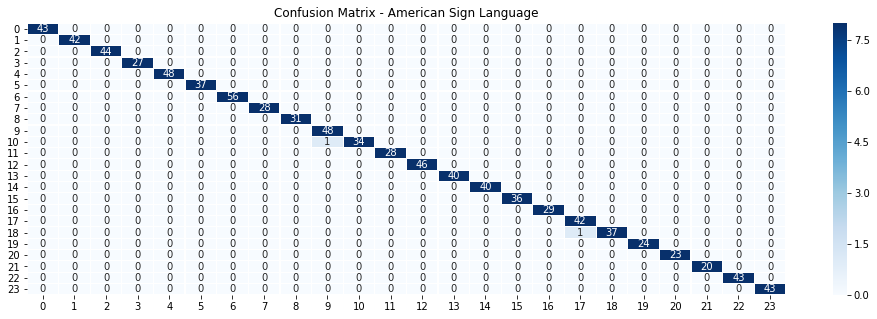

In [28]:

fig, ax = plt.subplots(figsize=(17, 5))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2, vmax=8,
                         ax=ax
                    )
maping


In [29]:
maping.figure.savefig("output.png")
